In [150]:
import tensorflow as tf

In [151]:
def f(w1, w2):
    return 3*w1 ** 2 + 2 * w1 * w2

In [152]:
w1 , w2 = tf.Variable(5.), tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1,w2])

In [153]:
w1 , w2 = tf.Variable(5.), tf.Variable(3.)
for i in range(10):
    with tf.GradientTape() as tape:
        z = f(w1, w2)
    gradients = tape.gradient(z, [w1,w2])
    #del tape

In [154]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [155]:
tape.gradient(f, w1), tape.gradient(f, w2)

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

> So funciona por meio do variables

### Loops de treinamento

In [156]:
import keras

In [157]:
l2_ = keras.regularizers.l2(0.05)

In [171]:
model = keras.models.Sequential(
    layers = [
        keras.layers.Flatten(),
        keras.layers.Dense(30, activation=keras.activations.elu,
                           kernel_initializer=keras.initializers.he_normal,
                           kernel_regularizer=l2_),
        keras.layers.Dense(1, kernel_regularizer=l2_)
    ]     
)

In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
r_ = np.random.RandomState(1)

X = r_.normal(0, 10, size=40)
y = X * 2 + r_.uniform(1, 10, size=40) + 50
X = X.reshape(-1, 1).astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)

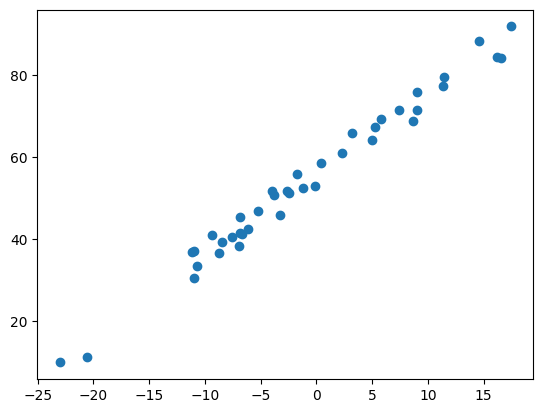

In [174]:
plt.scatter(X.reshape(1, -1)[0], y.reshape(1,-1)[0])

In [175]:
data = tf.data.Dataset.from_tensor_slices((X,y))

In [176]:
train_ = data\
            .batch(batch_size=5, drop_remainder=True)\
                .shuffle(buffer_size=10, seed=10)

In [1]:
from sklearn.linear_model import SGDRegressor

In [2]:
a = lambda x: 100

In [6]:
a(0)

100